In [5]:
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
# Load the rushee names (these will be nodes)
rushee_nodes = []
with open("rushees.txt", 'rb') as f:
    rushee_nodes = list(f.read().split('\n'))
    rushee_nodes = [n.strip() for n in rushee_nodes]

rushee_nodes.remove('')
print("Rushee names: %s" % rushee_nodes)

Rushee names: ['John Doe', 'Mary Sue', 'A guy with a long name', 'Mike']


In [7]:
# Load the active names (these will be nodes)
active_nodes = []
with open("actives.txt", 'rb') as f:
    active_nodes = list(f.read().split('\n'))
    active_nodes = [n.strip() for n in active_nodes]

active_nodes.remove('')
print("Active names: %s" % active_nodes)

Active names: ['Active Number 1', 'Active number two']


In [8]:
# Load the mentions (these will be directed edges)
all_edges = []
with open("mentions.txt", 'rb') as f:
    for line in f:
        edge = tuple([e.strip() for e in line.split(',')])
        if edge[0] not in active_nodes and edge[0] not in rushee_nodes:
            print('FOUND A NEW PERSON: "%s" not specified in active or rushee list!' % edge[0])
        if edge[1] not in active_nodes and edge[1] not in rushee_nodes:
            print('FOUND: %s not specified in active or rushee list!' % edge[1])
        all_edges.append(tuple([e.strip() for e in line.split(',')]))

# Extract the rushee only mentions
rushee_edges = [e for e in all_edges if e[0] in rushee_nodes and e[1] in rushee_nodes]
print("Rushee only mentions:")
for e in rushee_edges:
    print("\t%s => %s" % (e[0], e[1]))
print('\n')

print("All mentions:")
for e in all_edges:
    print("\t%s => %s" % (e[0], e[1]))
print('\n')

Rushee only mentions:
	John Doe => Mary Sue
	Mike => A guy with a long name
	Mary Sue => Mike
	Mike => Mary Sue
	A guy with a long name => Mike


All mentions:
	John Doe => Mary Sue
	Mike => A guy with a long name
	Mary Sue => Mike
	Mike => Mary Sue
	A guy with a long name => Mike
	Mike => Active Number 1
	Mike => Active number two




In [11]:
# Create our graphs

# Just the rushees
rushee_only_graph = nx.DiGraph()
rushee_only_graph.add_nodes_from(rushee_nodes)
rushee_only_graph.add_edges_from(rushee_edges)

# Rushees + actives
full_graph = nx.DiGraph()
full_graph.add_nodes_from(rushee_nodes)
full_graph.add_nodes_from(active_nodes)
full_graph.add_edges_from(all_edges)

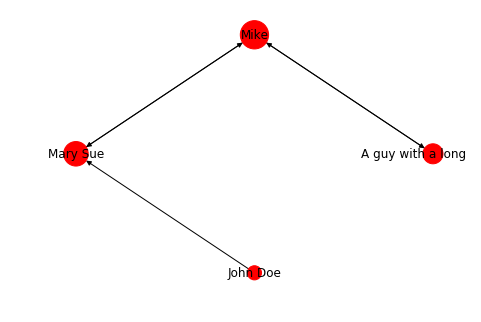

In [12]:
# Draw with just pledges
sizes = []
for n in rushee_only_graph.nodes():
    sizes.append(rushee_only_graph.degree(n) * 200)

nx.draw(rushee_only_graph, with_labels=True, pos=nx.circular_layout(rushee_only_graph), node_size=sizes)

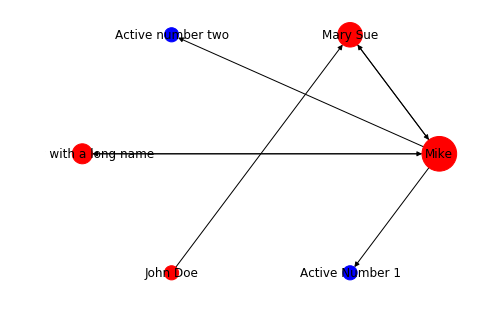

In [13]:
# Draw the full graph with the actives included
sizes = []
for n in full_graph.nodes():
    sizes.append(full_graph.degree(n) * 200)
colors = []

for n in full_graph.nodes():
    colors.append('r' if n in rushee_nodes else 'b')
# colors = ['r' for _ in rushee_nodes] + ['b' for _ in active_nodes]
nx.draw(full_graph, with_labels=True, pos=nx.circular_layout(full_graph), node_color=colors, node_size=sizes)